In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('Palladium.csv')
df.head(5)

,Open,Close,High,Low,Date
0,1067.5,1067.5,1067.5,1067.5,1/1/2018
1,1066.5,1096.0,1099.0,1066.0,1/2/2018
2,1095.5,1088.0,1097.0,1084.0,1/3/2018
3,1086.5,1102.5,1108.5,1083.5,1/4/2018
4,1100.0,1091.5,1103.0,1086.5,1/5/2018


In [3]:
# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)

# Sắp xếp lại index
df = df.sort_index(ascending=False)
df

,Open,Close,High,Low,Date
2109,914.5,914.5,914.5,914.5,2024-06-01
2108,949.5,914.5,956.0,903.5,2024-05-31
2107,957.0,950.5,962.0,932.5,2024-05-30
2106,982.5,968.0,983.0,946.5,2024-05-29
2105,995.5,975.5,997.0,969.5,2024-05-28
...,...,...,...,...,...
4,1100.0,1091.5,1103.0,1086.5,2018-01-05
3,1086.5,1102.5,1108.5,1083.5,2018-01-04
2,1095.5,1088.0,1097.0,1084.0,2018-01-03
1,1066.5,1096.0,1099.0,1066.0,2018-01-02


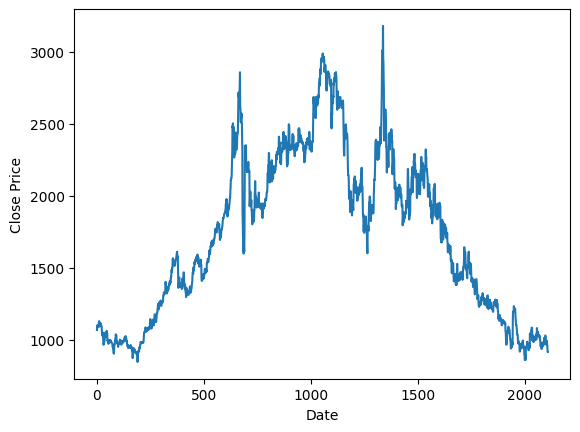

In [4]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df.index, df["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [5]:
df = df[['Close']]
df = df.reset_index(drop=True)
df.head(5)

,Close
0,914.5
1,914.5
2,950.5
3,968.0
4,975.5


In [6]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [7]:
# Chia train test theo tỉ lệ 8:2
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [8]:
train_data

array([[0.02937393],
       [0.02937393],
       [0.04481132],
       ...,
       [0.20004288],
       [0.20883362],
       [0.21419383]])

In [9]:
# Chuẩn bị dữ liệu cho x,y
def create_dataset(dataset, lags=1):
    X, Y = [], []
    for i in range(len(dataset)-lags-1):
        a = dataset[i:(i+lags), 0]
        X.append(a)
        Y.append(dataset[i + lags, 0])
    return np.array(X), np.array(Y)

In [10]:
#Thiết lập tham số cho model
lags = 30 
X_train, y_train = create_dataset(train_data, lags)
X_test, y_test = create_dataset(test_data, lags)

In [11]:
X_test

array([[0.21140652, 0.20475986, 0.22019726, ..., 0.22641509, 0.2238422 ,
        0.23327616],
       [0.20475986, 0.22019726, 0.22019726, ..., 0.2238422 , 0.23327616,
        0.23349057],
       [0.22019726, 0.22019726, 0.19296741, ..., 0.23327616, 0.23349057,
        0.23156089],
       ...,
       [0.05703259, 0.05660377, 0.05102916, ..., 0.10977702, 0.10956261,
        0.10527444],
       [0.05660377, 0.05102916, 0.06089194, ..., 0.10956261, 0.10527444,
        0.10999142],
       [0.05102916, 0.06089194, 0.07204117, ..., 0.10527444, 0.10999142,
        0.10377358]])

In [12]:
#In thông tin kích thước của dữ liệu
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1657, 30) (1657,)
(391, 30) (391,)


In [13]:
model = SVR()

# Thiết lập phạm vi tốt cho các tham số
C_range = [0.1, 1, 10]  # Thay đổi tại đây
gamma_range = [0.01, 0.1, 1]  # Thay đổi tại đây
kernel_range = ['poly', 'linear', 'sigmoid'] #tạo ra 3 giá trị cho kernel

# Tạo lưới các giá trị tham số
param_grid = {'C': C_range, 'gamma': gamma_range, 'kernel': kernel_range}

# Thiết lập model với các tham số và số lượng folds cross-validation
model = GridSearchCV(model, param_grid, refit=True, verbose=3, cv=5, scoring='neg_mean_squared_error')

#trong đó:
#clf: model
#param_grid: tham số
#refit: lưu lại model tốt nhất
#verbose: hiển thị thông tin
#cv: số lượng folds cross-validation (chọn 5 folds cross-validation)
#scoring: đánh giá model bằng MSE

#8. Huấn luyện model
model.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.130 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.009 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.036 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.047 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.016 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=0.01, kernel=linear;, score=-0.000 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.01, kernel=linear;, score=-0.001 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.01, kernel=linear;, score=-0.003 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.01, kernel=linear;, score=-0.002 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.01, kernel=linear;, score=-0.003 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.01, kernel=sigmoid;, score=-0.011 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.01, kernel=sigmoid;

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['poly', 'linear', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=3)

In [14]:
model.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}

In [15]:
#Dự báo dự liệu dựa trên tập test
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()

In [16]:
y_pred

array([1392.51564946, 1400.02372698, 1398.95279632, 1384.16662446,
       1371.8912442 , 1350.2786982 , 1355.21331509, 1407.47830617,
       1435.48463192, 1415.84802074, 1409.48592489, 1381.56712874,
       1412.58731669, 1491.17696484, 1555.71578124, 1582.45500973,
       1599.91149512, 1604.61271184, 1581.66558436, 1566.06200567,
       1549.10995072, 1541.7650654 , 1519.37185752, 1519.77080341,
       1537.62192151, 1553.03820267, 1540.14972778, 1522.15028735,
       1539.1104985 , 1559.28436333, 1565.20407028, 1540.44479388,
       1519.69753722, 1481.449753  , 1473.89645159, 1517.04579774,
       1543.25390409, 1568.03833623, 1528.03658775, 1476.04246712,
       1481.23268191, 1498.92842239, 1504.40176729, 1511.98183094,
       1494.38344996, 1481.38368987, 1495.7096387 , 1480.73785006,
       1468.71984065, 1463.40981506, 1427.92642158, 1432.55538192,
       1442.70935081, 1424.88368006, 1411.87491388, 1423.47345568,
       1401.14442259, 1397.05922209, 1392.95452646, 1381.61051

In [17]:
# 10. Đánh giá độ chính xác thuật toán bằng MAPE, MSE và RMSE

#MAPE
test_mape = mean_absolute_percentage_error(y_pred, y_test)
#MSE
test_mse = mean_squared_error(y_pred, y_test)
#RMSE
test_rmse = np.sqrt(test_mse)

print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)
print('Testing RMSE:', test_rmse)

Testing MAPE: 0.9999051341843631
Testing MSE: 1306331.8406087921
Testing RMSE: 1142.948748023634


In [18]:
# Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
lags=30
i=0
while(i<30):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output.append(yhat)
        i=i+1


0 day input [0.07204117 0.08190395 0.08704974 0.0885506  0.08404803 0.07911664
 0.09048027 0.10548885 0.10591767 0.10591767 0.1093482  0.11427959
 0.10634648 0.10806175 0.11256432 0.11256432 0.10956261 0.11749571
 0.10720412 0.12135506 0.11835334 0.10355918 0.10334477 0.10977702
 0.10956261 0.10527444 0.10999142 0.10377358 0.10720412 0.09498285]
0 day output 0.09261935039927226
1 day input [0.08190395 0.08704974 0.0885506  0.08404803 0.07911664 0.09048027
 0.10548885 0.10591767 0.10591767 0.1093482  0.11427959 0.10634648
 0.10806175 0.11256432 0.11256432 0.10956261 0.11749571 0.10720412
 0.12135506 0.11835334 0.10355918 0.10334477 0.10977702 0.10956261
 0.10527444 0.10999142 0.10377358 0.10720412 0.09498285 0.09261935]
1 day output 0.09566202779136466
2 day input [0.08704974 0.0885506  0.08404803 0.07911664 0.09048027 0.10548885
 0.10591767 0.10591767 0.1093482  0.11427959 0.10634648 0.10806175
 0.11256432 0.11256432 0.10956261 0.11749571 0.10720412 0.12135506
 0.11835334 0.10355918 0.

In [19]:
# 13. Dự báo 60 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
lags=30
i=0
while(i<60):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_60.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_60.append(yhat)
        i=i+1


0 day input [0.07204117 0.08190395 0.08704974 0.0885506  0.08404803 0.07911664
 0.09048027 0.10548885 0.10591767 0.10591767 0.1093482  0.11427959
 0.10634648 0.10806175 0.11256432 0.11256432 0.10956261 0.11749571
 0.10720412 0.12135506 0.11835334 0.10355918 0.10334477 0.10977702
 0.10956261 0.10527444 0.10999142 0.10377358 0.10720412 0.09498285]
0 day output 0.09261935039927226
1 day input [0.08190395 0.08704974 0.0885506  0.08404803 0.07911664 0.09048027
 0.10548885 0.10591767 0.10591767 0.1093482  0.11427959 0.10634648
 0.10806175 0.11256432 0.11256432 0.10956261 0.11749571 0.10720412
 0.12135506 0.11835334 0.10355918 0.10334477 0.10977702 0.10956261
 0.10527444 0.10999142 0.10377358 0.10720412 0.09498285 0.09261935]
1 day output 0.09566202779136466
2 day input [0.08704974 0.0885506  0.08404803 0.07911664 0.09048027 0.10548885
 0.10591767 0.10591767 0.1093482  0.11427959 0.10634648 0.10806175
 0.11256432 0.11256432 0.10956261 0.11749571 0.10720412 0.12135506
 0.11835334 0.10355918 0.

In [20]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
lags=30
i=0
while(i<90):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_90.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_90.append(yhat)
        i=i+1


0 day input [0.07204117 0.08190395 0.08704974 0.0885506  0.08404803 0.07911664
 0.09048027 0.10548885 0.10591767 0.10591767 0.1093482  0.11427959
 0.10634648 0.10806175 0.11256432 0.11256432 0.10956261 0.11749571
 0.10720412 0.12135506 0.11835334 0.10355918 0.10334477 0.10977702
 0.10956261 0.10527444 0.10999142 0.10377358 0.10720412 0.09498285]
0 day output 0.09261935039927226
1 day input [0.08190395 0.08704974 0.0885506  0.08404803 0.07911664 0.09048027
 0.10548885 0.10591767 0.10591767 0.1093482  0.11427959 0.10634648
 0.10806175 0.11256432 0.11256432 0.10956261 0.11749571 0.10720412
 0.12135506 0.11835334 0.10355918 0.10334477 0.10977702 0.10956261
 0.10527444 0.10999142 0.10377358 0.10720412 0.09498285 0.09261935]
1 day output 0.09566202779136466
2 day input [0.08704974 0.0885506  0.08404803 0.07911664 0.09048027 0.10548885
 0.10591767 0.10591767 0.1093482  0.11427959 0.10634648 0.10806175
 0.11256432 0.11256432 0.10956261 0.11749571 0.10720412 0.12135506
 0.11835334 0.10355918 0.

In [21]:
# Inverse transform the future predictions
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()
lst_output_60 = scaler.inverse_transform(np.array(lst_output_60).reshape(-1, 1)).flatten()
lst_output_90 = scaler.inverse_transform(np.array(lst_output_90).reshape(-1, 1)).flatten()

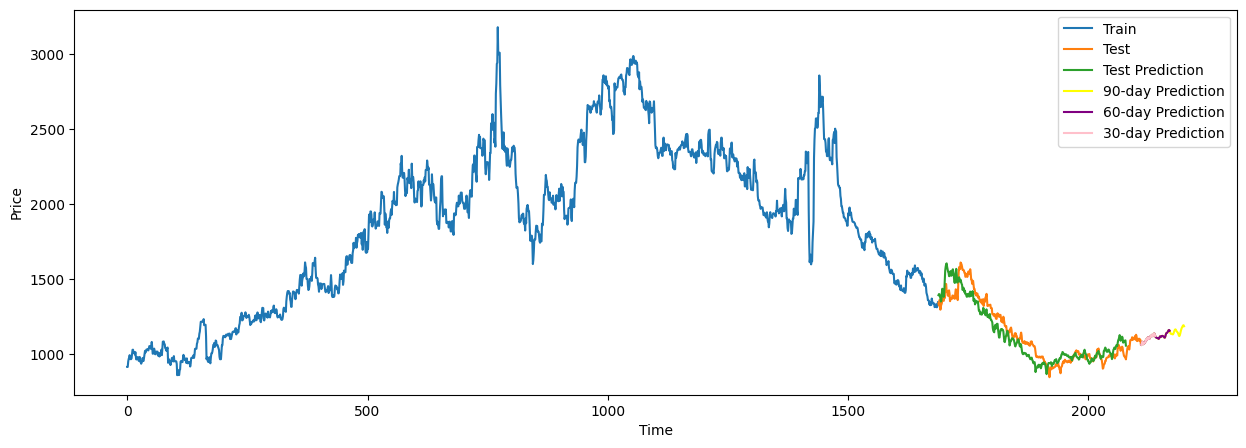

In [22]:
plt.figure(figsize=(15, 5))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

test_pred_index = pd.RangeIndex(start=train_size, stop=train_size+len(y_pred), step=1)
plt.plot(test_pred_index, y_pred, label='Test Prediction')

next_90days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_90), step=1)
plt.plot(next_90days_pred_index, lst_output_90, color='yellow', label='90-day Prediction')

next_60days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_60), step=1)
plt.plot(next_60days_pred_index, lst_output_60, color='purple', label='60-day Prediction')

next_30days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output), step=1)
plt.plot(next_30days_pred_index, lst_output, color='pink', label='30-day Prediction')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()